# practicalMixGaussC

The goal of this part of the lab is to fit a mixture of gaussians model to some multi-dimensional data. To do this, we will first generate some data from a known mixture of gaussians model and fit our own mixture of gaussians model to the generated data. The parameters from our estimated mixture of gaussians model should roughly match those of the original known model. 

Note that you should not use multivariate_normal.pdf for calculating likelihood.

You should use this template for your code and fill in the missing 
sections marked "TO DO."



In [56]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
from scipy.stats import norm 
from scipy.stats import multivariate_normal
import time
import sys

flt_min = sys.float_info.min

%matplotlib notebook
%matplotlib inline

## Construct Ground Truth Mixture of Gaussians Model and Plot Some Points

Define some true parameters for our ground truth mixture of $k$ Gaussians model. We will represent the 
mixtures of Gaussians as a python dictionary. The mean field is a $d \times k$ matrix and the cov field is a 
$d \times d \times k$ matrix.

In [57]:
mixGaussTrue = dict()
mixGaussTrue['k'] = 3
mixGaussTrue['d'] = 2
mixGaussTrue['weight'] = np.array([0.1309, 0.3966, 0.4725])
mixGaussTrue['mean'] = np.array([[ 4.0491 , 4.8597],[ 7.7578 , 1.6335],[ 11.9945, 8.9206]]).T
mixGaussTrue['cov'] = np.reshape([0.5, 0.25], newshape=(1,1,2))
mixGaussTrue['cov'] = np.zeros(shape=(mixGaussTrue['d'],mixGaussTrue['d'],mixGaussTrue['k']))
mixGaussTrue['cov'][:,:,0] = np.array([[  4.2534, 0.4791], [0.4791, 0.3522]])
mixGaussTrue['cov'][:,:,1] = np.array([[  0.9729, 0.8723],[  0.8723,  2.6317]])
mixGaussTrue['cov'][:,:,2] = np.array([[  0.9886, -1.2244],[ -1.2244, 3.0187]])

**drawEMData2d**, **sampleFromDiscrete**, **getGaussian2SD**, and **drawGaussianOutline** are helper functions.

In [58]:
def sampleFromDiscrete(probDist):     
    """
    Draws a random sample from a discrete probability distribution using a rejection sampling method.  
    
    Keyword arguments:
    probDist -- discrete probability ditrubtion to sample from.
    
    Returns: 
    r -- sampled point.
    """
    nIndex = len(probDist)                                                                 
    while True:                                                                            
        #choose random index                                                               
        r=int(np.floor(np.random.uniform()*nIndex))                                        
        #choose random height                                                              
        randHeight = np.random.uniform()                                                   
        #if height is less than probability value at this point in the                     
        # histogram then select                                                            
        if randHeight<probDist[r]:                                                         
            break                                                                          
    return r                                                                               

In [59]:
def getGaussian2SD(m,s,angle1):
    """
    Find position of in xy co-ordinates at 2SD out for a certain angle.
    """
  
    if s.shape[1] == 1:
        s = np.diag(s)

    vec = np.array([np.cos(angle1), np.sin(angle1)])
    
    factor = 4/(vec@np.linalg.inv(s)@vec.T)
    
    x = np.cos(angle1) * np.sqrt(factor)
    y = np.sin(angle1) * np.sqrt(factor)

    x = x + m[0]
    y = y + m[1]
                
    return x,y

In [60]:
def drawGaussianOutline(m,s,w):
    """
    Draw 2DGaussian
    """
    angleInc = 0.1    
    c = (0.9*(1-w), 0, 0)

    for cAngle in np.arange(0,2*np.pi,angleInc):         
        angle1 = cAngle
        angle2 = cAngle+angleInc
        x1, y1 = getGaussian2SD(m,s,angle1)
        x2, y2 = getGaussian2SD(m,s,angle2)
        plt.plot([x1, x2],[y1, y2],'-',linewidth=2,color=c)                 
    return

In [61]:
def drawEMData2d(data,mixGauss):
    """
    Plot the data plot the mixtures of Gaussian model, mixGauss, on top of it.
    
    Keyword arguments:
    data -- d by n matrix of data points.
    mixGauss -- dict with mixture of gaussian information.
    
    """
    #set(gcf,'Color',[1 1 1])
    plt.cla() 
    plt.plot(data[0,:],data[1,:],'k.')

    for cGauss in range(mixGauss['k']):
        drawGaussianOutline(mixGauss['mean'][:,cGauss],mixGauss['cov'][:,:,cGauss],mixGauss['weight'][cGauss])
    
    return     


**TODO HERE:**

Complete the TO DO in this function before moving on.

In [62]:
def mixGaussGen(mixGauss, nData):                                                                              
    """
    Generates data from a d-dimensional mixture of Gaussians model. 
    
    Keyword arguments:
    mixGauss -- dict containing the mixture of gaussians arguments.
    nData -- number of data points to generate.
    
    Returns: 
    data -- d by nData, generated data points. 
    
    """
    # create space for output data                                                                               
    data = np.zeros(shape=(mixGauss['d'], nData))
    # for each data point
    for cData in range(nData):
        # randomly choose Gaussian according to probability distributions                                        
        h = sampleFromDiscrete(mixGauss['weight']) #h is entry of selected discrete value, aka the multivariate normal chosen to generate data
        
        mean = mixGauss["mean"][:,h]
        cov_matrix = mixGauss["cov"][:,:,h]
        #Following what I found on google as instructed:
        L = np.linalg.cholesky(cov_matrix) #Cholesky decomposition

        #We now generate independent samples from a gaussian: u ∼ N(0,I)
        u = np.random.normal(loc = 0, scale = 1,size = mixGauss['d'])

        #Finally acquire desired samples
        x = mean + (L @ u)

        data[:,cData] = x.T

    #Sanity check
    if (mixGauss['d'], nData) != data.shape:
        print("Got dimensions wrong")       
                                                                   
    return data 

With all the helper functions complete, we can now generate and plot some points from our model. The black points are the generated data points. The circles are what the gaussians look like.

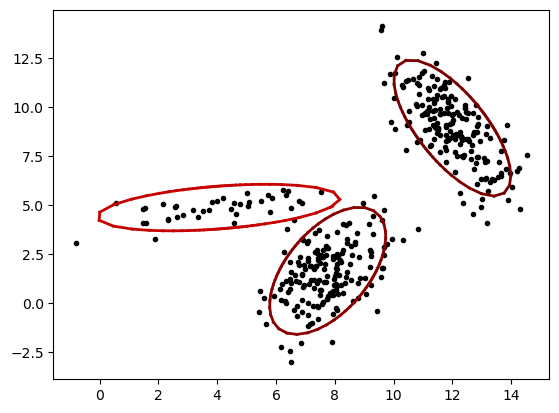

In [63]:
#define number of samples to generate
nData = 400

#generate data from the mixture of Gaussians
#make sure you've filled in the routine above.
data = mixGaussGen(mixGaussTrue,nData)

#draw data, true Gaussians
drawEMData2d(data,mixGaussTrue)

We produce a ground truth mixture of multivariate gaussians, shown in red in the plot above.
\
\
We then sample 400 data points out of such mixture of multivariate gaussians, shown as black dots in the plot above.

## Estimate MoG using the E-M Algorithm
Here we want to use the E-M algorithm to fit a MoG model to our data points. 

**TODO HERE:** 

Fill out the missing parts below. 

The log likelihood is taken since the raw likelihood value could be too small for our machine's percision.

In [64]:
def getMixGaussLogLike(data, mixGaussEst): 
    """
    Calculate the log likelihood for the whole dataset under a mixture of Gaussians model.
    
    Keyword arguments:
    data -- d by n matrix containing data points.
    mixGaussEst -- dict containing the mixture of gaussians parameters.

    Returns: 
    logLike -- scalar containing the log likelihood.
    
    """
    
    data = np.atleast_2d(data)
    
    # find total number of data items                                                                  
    nDims, nData = data.shape                                                                          
    
    # initialize log likelihoods                                                                       
    logLike = 0
                                                                                                       
    # run through each data item                                                                       
    for cData in range(nData):                                                                         
        thisData = data[:, cData]

        like = []
        for k in range(mixGaussEst["k"]):
            #gamma_k as shown in cribsheet
            gamma_k = mixGaussEst["weight"][k]
            #Probability of d-dimensional data to have been generated from k-th multivariate gaussian
            constant_term = (2*np.pi)**(-0.5*mixGaussEst["d"])
            add_det_term = constant_term * (np.linalg.det(mixGaussEst["cov"][:,:,k])**(-0.5))
            difference_vector = thisData - mixGaussEst["mean"][:,k]
            exp_term = np.exp(-0.5*(np.transpose(difference_vector) @ np.linalg.inv(mixGaussEst["cov"][:,:,k]) @ difference_vector))
            prob = add_det_term * exp_term
            #Add the log of the multiplication of both terms
            like.append(gamma_k*prob)

        like = np.array(like)
        logLike += np.log(np.sum(like))

    return  logLike

**TODO HERE:** 

Fill out the missing parts below. 

In [65]:
def fitMixGauss(data, k):
    """
    Estimate a k MoG model that would fit the data. Incremently plots the outcome.
               
    
    Keyword arguments:
    data -- d by n matrix containing data points.
    k -- scalar representing the number of gaussians to use in the MoG model.
    
    Returns: 
    mixGaussEst -- dict containing the estimated MoG parameters.
    
    """
    
    #     MAIN E-M ROUTINE  
    #     In the E-M algorithm, we calculate a complete posterior distribution over                                  
    #     the (nData) hidden variables in the E-Step.  
    #     In the M-Step, we update the parameters of the Gaussians (mean, cov, w).   
    
    nDims, nData = data.shape


    postHidden = np.zeros(shape=(k, nData))

    # we will initialize the values to random values
    mixGaussEst = dict()
    mixGaussEst['d'] = nDims
    mixGaussEst['k'] = k
    mixGaussEst['weight'] = (1 / k) * np.ones(shape=(k))
    mixGaussEst['mean'] = 2 * np.random.randn(nDims, k)
    mixGaussEst['cov'] = np.zeros(shape=(nDims, nDims, k))
    for cGauss in range(k):
        mixGaussEst['cov'][:, :, cGauss] = 2.5 + 1.5 * np.random.uniform() * np.eye(nDims)
        

    # calculate current likelihood
    # TO DO - fill in this routine
    logLike = getMixGaussLogLike(data, mixGaussEst)
    print('Log Likelihood Iter 0 : {:4.3f}\n'.format(logLike))

    nIter = 30

    logLikeVec = np.zeros(shape=(2 * nIter))
    boundVec = np.zeros(shape=(2 * nIter))

    fig, ax = plt.subplots(1, 1)

    for cIter in range(nIter):

        # ===================== =====================
        # Expectation step
        # ===================== =====================

        responsabilities = []
        for cData in range(nData):
            # TO DO (g) : fill in column of 'hidden' - calculate posterior probability that
            # this data point came from each of the Gaussians
            # replace this:

            thisData = data[:, cData]
            #Need to update responsabilities matrix
            l = []
            for k_1 in range(k):
                #Need to first calculate probability of each datapoint being in k1-th dist and multiply it for chance of being in that dist
                #gamma_k as shown in cribsheet
                gamma_k = mixGaussEst["weight"][k_1]
                #Probability of d-dimensional data to have been generated from k-th multivariate gaussian
                constant_term = (2*np.pi)**(-0.5*mixGaussEst["d"])
                add_det_term = constant_term * (np.linalg.det(mixGaussEst["cov"][:,:,k_1])**(-0.5))
                difference_vector = thisData - mixGaussEst["mean"][:,k_1]
                exp_term = np.exp(-0.5*(np.transpose(difference_vector) @ np.linalg.inv(mixGaussEst["cov"][:,:,k_1]) @ difference_vector))

                l.append(gamma_k*add_det_term * exp_term)

            l = np.array(l)
            #Need to normalise the responsabilities
            l = l/(np.sum(l))
            #Add it to responsabilities
            responsabilities.append(l)
            
        responsabilities = np.transpose(np.array(responsabilities))

        # ===================== =====================
        # Maximization Step
        # ===================== =====================
        # for each constituent Gaussian
        for cGauss in range(k):
            # TO DO (h):  Update weighting parameters mixGauss.weight based on the total
            # posterior probability associated with each Gaussian. Replace this:
            mixGaussEst['weight'][cGauss] = np.sum(responsabilities[cGauss,:])/nData
            
            
            # TO DO (i):  Update mean parameters mixGauss.mean by weighted average
            # where weights are given by posterior probability associated with
            # Gaussian.  Replace this:
            mixGaussEst['mean'][:,cGauss] = np.sum(responsabilities[cGauss,:]*data,axis=1)/np.sum(responsabilities[cGauss,:])
            
            
            # TO DO (j):  Update covarance parameter based on weighted average of
            # square distance from update mean, where weights are given by
            # posterior probability associated with Gaussian
            diff = np.transpose(data)-mixGaussEst['mean'][:,cGauss]
            first = np.transpose(diff) * responsabilities[cGauss,:]
            second = first @ diff
            mixGaussEst['cov'][:,:,cGauss] = second/ np.sum(responsabilities[cGauss,:])
            
        # draw the new solution
        drawEMData2d(data, mixGaussEst)
        time.sleep(0.7)
        fig.canvas.draw()

        # calculate the log likelihood
        logLike = getMixGaussLogLike(data, mixGaussEst)
        print('Log Likelihood After Iter {} : {:4.3f}\n'.format(cIter, logLike))


    return mixGaussEst

### Time to put it all together!

Make sure you've filled all the TO DOs above! 

Log Likelihood Iter 0 : -5183.738

Log Likelihood After Iter 0 : -1947.117

Log Likelihood After Iter 1 : -1935.526

Log Likelihood After Iter 2 : -1927.163

Log Likelihood After Iter 3 : -1916.857

Log Likelihood After Iter 4 : -1903.415

Log Likelihood After Iter 5 : -1889.927

Log Likelihood After Iter 6 : -1879.516

Log Likelihood After Iter 7 : -1872.286

Log Likelihood After Iter 8 : -1867.041

Log Likelihood After Iter 9 : -1862.959

Log Likelihood After Iter 10 : -1859.594

Log Likelihood After Iter 11 : -1856.532

Log Likelihood After Iter 12 : -1853.333

Log Likelihood After Iter 13 : -1849.419

Log Likelihood After Iter 14 : -1843.674

Log Likelihood After Iter 15 : -1833.572

Log Likelihood After Iter 16 : -1813.900

Log Likelihood After Iter 17 : -1773.493

Log Likelihood After Iter 18 : -1701.709

Log Likelihood After Iter 19 : -1653.262

Log Likelihood After Iter 20 : -1637.960

Log Likelihood After Iter 21 : -1625.879

Log Likelihood After Iter 22 : -1612.685

Log Likel

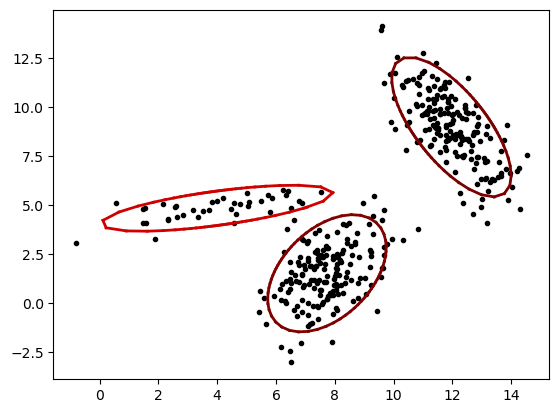

In [66]:
#define number of components to estimate
nGaussEst = 3

#fit mixture of Gaussians (Pretend someone handed you some data. Now what?)
#TO DO fill in this routine (below)
mixGaussEst = fitMixGauss(data,nGaussEst)

Given the 400 sampled points shown above, we fit three, 3-dimensional gaussians via the EM algorithm I defined above.
\
\
Please note, since initialisations are random, the EM algorithm can converges to undesired results. I have found it to converge to the desired results the majority of times, but it is not uncommon for it to converge to a different mode. For further improvement, I would improve initialisation conditions for our EM algorithm to converge to the desired result more often.